In [1]:
import sys
from pathlib import Path

# Add the parent directory to the path so we can import from src
sys.path.append(str(Path().resolve().parent))

from src.constants import WINDOW_CACHE_PATH, REST_PATH

import torch
import os
import matplotlib.pyplot as plt

from src.meg_loader import load_meg_data

In [2]:
os.listdir(WINDOW_CACHE_PATH)

['sub-CC110037', 'sub-CC110045', 'sub-CC110033']

In [15]:
cache_items = os.listdir(WINDOW_CACHE_PATH)
subject = cache_items[0]
subdir_items = os.listdir(WINDOW_CACHE_PATH / subject)
first_file = subdir_items[0]
window = torch.load(WINDOW_CACHE_PATH / subject / "0.pt").numpy()

In [16]:
subject, first_file

('sub-CC110037', '849.pt')

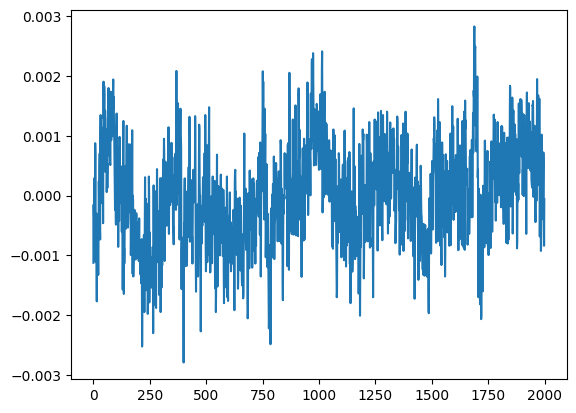

In [17]:
plt.plot(window[0])

In [18]:
REST_PATH

PosixPath('/Users/yihein.chai/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Research/meg/CamCAN/cc700/rest')

In [19]:
subject_data = load_meg_data(subject, REST_PATH)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


In [20]:
subject_data.shape

torch.Size([306, 562000])

In [30]:
import scipy.stats

subject_data = torch.tensor(scipy.stats.zscore(subject_data.numpy(), axis=1))
window_real = subject_data[:, :2000]
window_real.shape, window.shape

(torch.Size([306, 2000]), (306, 2000))

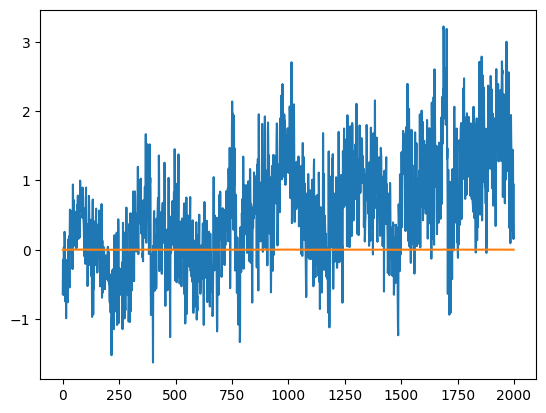

In [34]:
plt.plot(window_real[0])
plt.plot(window[0])

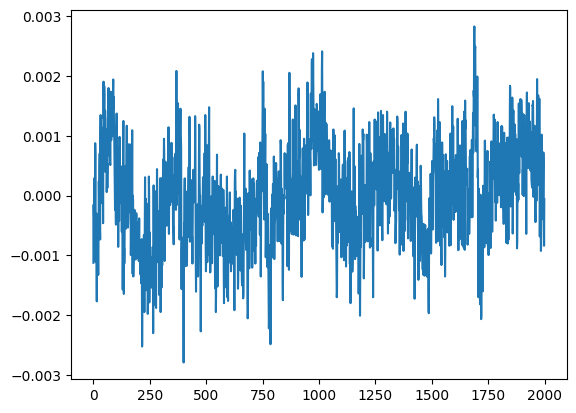

In [25]:
plt.plot(window[0])